# **TASK 2 — Exploratory Data Analysis (EDA)**

# 1. Loading the Dataset

```
1.1 Data From GitHub
1.2 Display First 5 Rows
1.3 Dataset Information
```



In [15]:
# 1.1 Data From GitHub

import pandas as pd

# GitHub raw URL
url = 'https://raw.githubusercontent.com/abuthahir17/Dataset/main/Telco_Customer_Churn_Dataset.csv'

# Read CSV file
data = pd.read_csv(url)

print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [16]:
# 1.2 Display First 5 rows
print("First Five Rows in the Dataset: \n")
data.head()

First Five Rows in the Dataset: 



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
# 1.3 Dataset Information
print("\nDataset Info:\n")
print(data.info())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

# 2. Handling Missing Values


```
2.1 Check the missing values
2.2 TotalCharges -> Numeric (Convert)
2.3 Fill with Median
2.4 Recheck Null (missing) values
```



In [18]:
# 2.1 Check the missing values
data.replace(" ", None, inplace=True)
print("Missing Value: \n", data.isnull().sum())

Missing Value: 
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [19]:
# 2.2 Convert TotalCharges to Numeric
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [20]:
# 2.3 Fill the missing value with median
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].median())

In [21]:
# 2.4 Also Check the " " value
data.replace(" ", None, inplace=True)
print("Missing Value after Cleaning: \n", data.isnull().sum())

Missing Value after Cleaning: 
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# 3. Calculate and visually represent the overall churn rate



```
3.1 Calculation for churn rate
3.2 Visual Representation
```



In [22]:
# 3.1 Calculate churn rate
churn_rate = data['Churn'].value_counts(normalize=True) * 100
print("Overall Churn Rate in Percentage:")
print(churn_rate)

Overall Churn Rate in Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


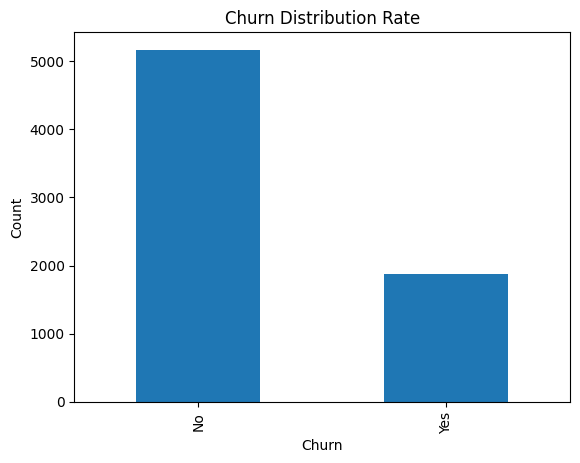

In [23]:
# 3.2 Visual Representation for churn distribution Rate

import matplotlib.pyplot as plt

plt.figure()
data['Churn'].value_counts().plot(kind='bar')
plt.title("Churn Distribution Rate" )
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# 4. Explore customer distribution by gender, partner status, and dependent status.



```
4.1 Gender vs Churn
4.2 Partner Status vs Churn
4.3 Dependent Status vs Churn
```





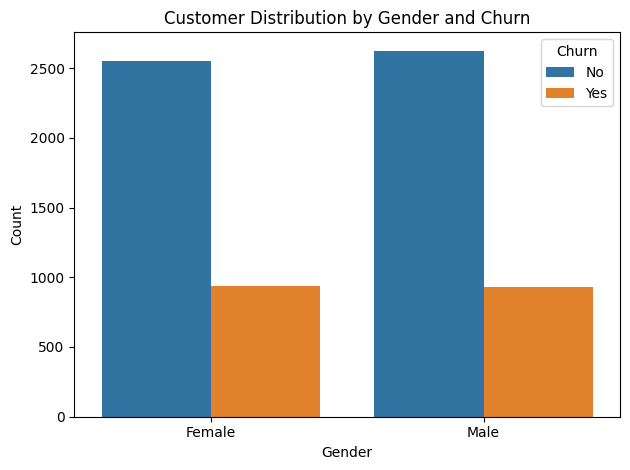

Churn,Churn_No,Churn_Yes
gender,,
Female,73.08,26.92
Male,73.84,26.16


In [44]:
# 4.1 Gender vs Churn

# Plot the Graph

import seaborn as sns
plt.figure()
sns.countplot(data=data, x="gender", hue="Churn")
plt.title("Customer Distribution by Gender and Churn")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Gender_Churn_Rate
gender_churn = (
    data.groupby("gender")["Churn"]
    .value_counts(normalize=True)
    .unstack() * 100
).rename(columns={"Yes": "Churn_Yes", "No": "Churn_No"})

gender_churn.round(2)

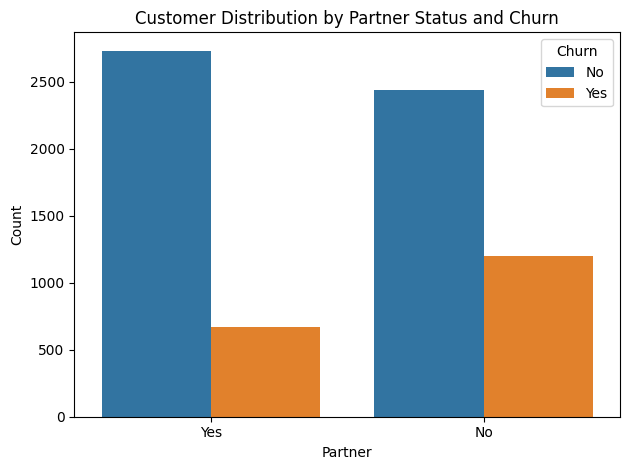

Churn,Churn_No,Churn_Yes
Partner,,
No,67.04,32.96
Yes,80.34,19.66


In [45]:
# 4.2 Partner Status vs Churn

# Plot the Graph
plt.figure()
sns.countplot(data=data, x="Partner", hue="Churn")
plt.title("Customer Distribution by Partner Status and Churn")
plt.xlabel("Partner")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Partner_Churn_Rate
partner_churn = (
    data.groupby("Partner")["Churn"]
    .value_counts(normalize=True)
    .unstack() * 100
).rename(columns={"Yes": "Churn_Yes", "No": "Churn_No"})

partner_churn.round(2)

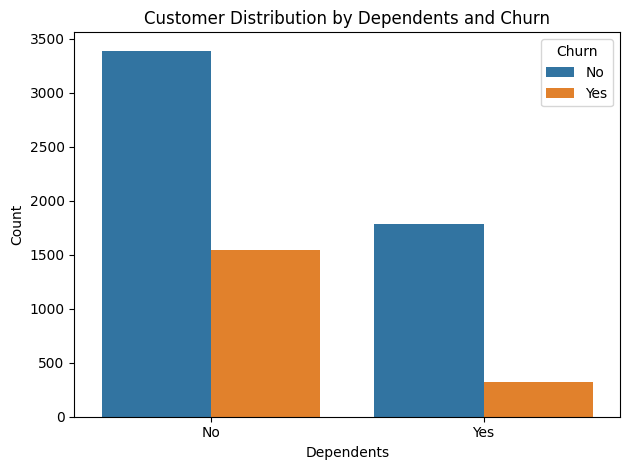

Churn,Churn_No,Churn_Yes
Dependents,,
No,68.72,31.28
Yes,84.55,15.45


In [46]:
# 4.3 Dependent Status vs Churn

# Plot the Graph
plt.figure()
sns.countplot(data=data, x="Dependents", hue="Churn")
plt.title("Customer Distribution by Dependents and Churn")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Dependents_Churn_Rate
dependents_churn = (
    data.groupby("Dependents")["Churn"]
    .value_counts(normalize=True)
    .unstack() * 100
).rename(columns={"Yes": "Churn_Yes", "No": "Churn_No"})

dependents_churn.round(2)

# 5. Analyze Tenure distribution and its relation with churn.



```
5.1 Overall tenure distribution
5.2 Tenure distribution split by churn
5.3 Boxplot – tenure vs churn
5.4 Summary statistics – tenure by churn
```




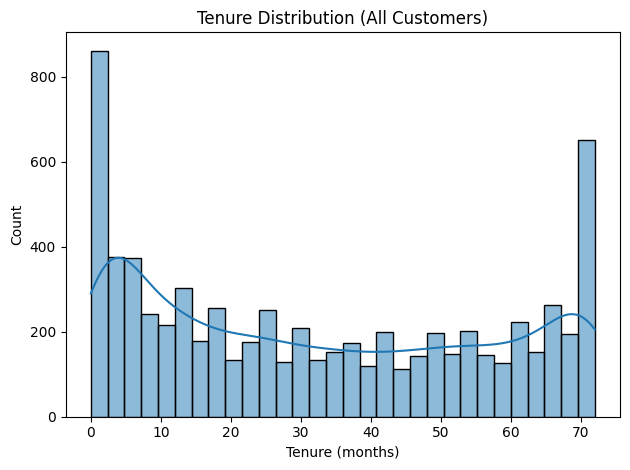

In [33]:
# 5.1 Overall tenure distribution
plt.figure()
sns.histplot(data["tenure"], bins=30, kde=True)
plt.title("Tenure Distribution (All Customers)")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

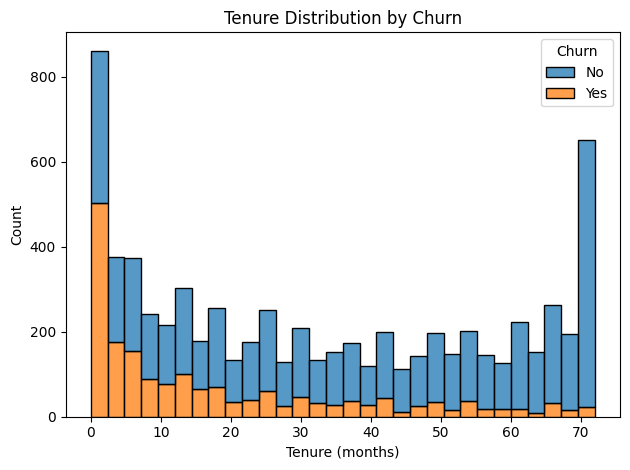

In [34]:
# 5.2 Tenure distribution split by churn
plt.figure()
sns.histplot(data=data, x="tenure", hue="Churn", bins=30, kde=False, multiple="stack")
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

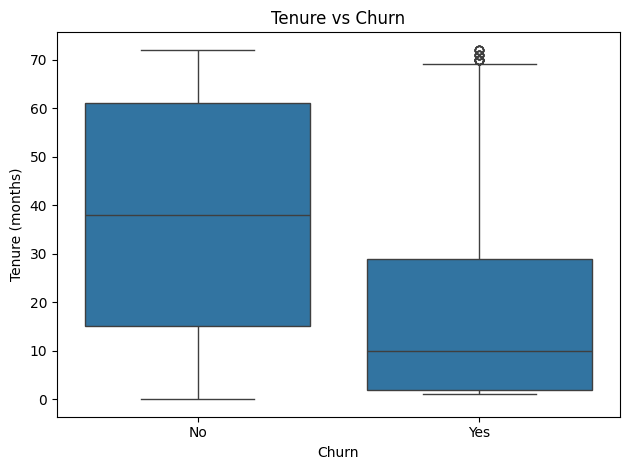

In [35]:
# 5.3 Boxplot – tenure vs churn
plt.figure()
sns.boxplot(data=data, x="Churn", y="tenure")
plt.title("Tenure vs Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (months)")
plt.tight_layout()
plt.show()

In [36]:
# 5.4 Summary statistics – tenure by churn
tenure_stats = data.groupby("Churn")["tenure"].describe()
print("\nTenure statistics by Churn:")
display(tenure_stats.round(2))


Tenure statistics by Churn:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.57,24.11,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.98,19.53,1.0,2.0,10.0,29.0,72.0


# 6. How Churn varies across different Contract Types and Payment methods.



```
6.1 Churn vs Contract Type
6.2 Churn Rate by Contract
6.3 Churn vs Payment Method
6.4 Churn rate by Payment Method
```



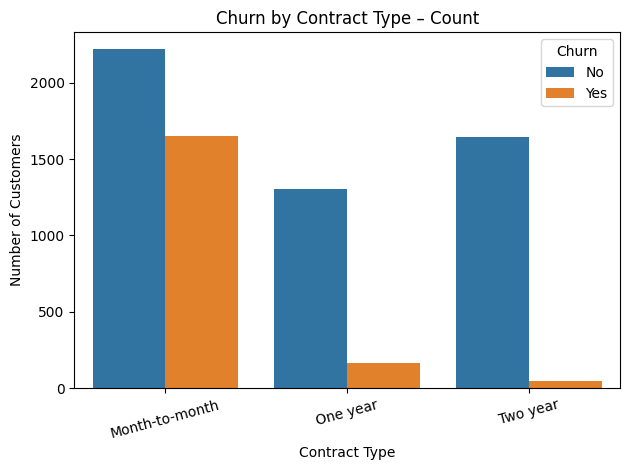

In [37]:
# 6.1 Churn vs Contract Type
plt.figure()
sns.countplot(data=data, x="Contract", hue="Churn")
plt.title("Churn by Contract Type – Count")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Churn rate (%) by Contract type:


Churn,Churn_No,Churn_Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


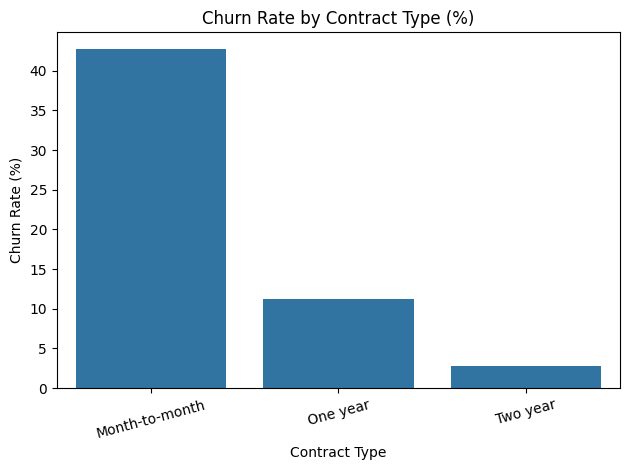

In [41]:
# 6.2 Churn Rate by Contract
churn_by_contract = (
    data.groupby("Contract")["Churn"]
    .value_counts(normalize=True)
    .unstack()
    .rename(columns={"Yes": "Churn_Yes", "No": "Churn_No"}) * 100
)

print("\nChurn rate (%) by Contract type:")
display(churn_by_contract.round(2))
print("\n")


# For clear visualization of churn rate only (Yes)
plt.figure()
sns.barplot(
    x=churn_by_contract.index,
    y=churn_by_contract["Churn_Yes"]
)
plt.title("Churn Rate by Contract Type (%)")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

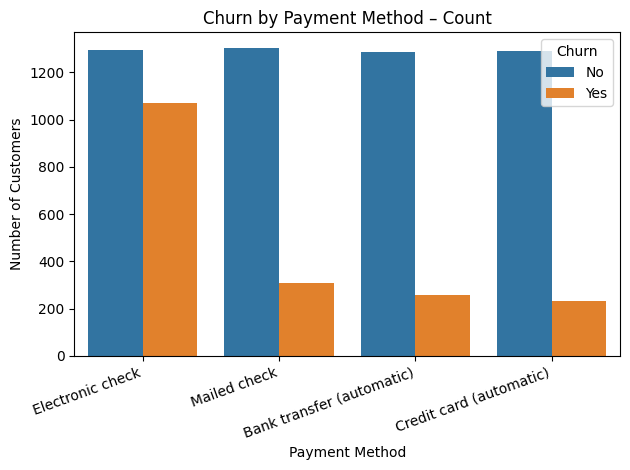

In [42]:
# 6.3 Churn vs Payment Method
plt.figure()
sns.countplot(data=data, x="PaymentMethod", hue="Churn")
plt.title("Churn by Payment Method – Count")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()


Churn rate (%) by Payment Method:


Churn,Churn_No,Churn_Yes
PaymentMethod,,
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24
Electronic check,54.71,45.29
Mailed check,80.89,19.11


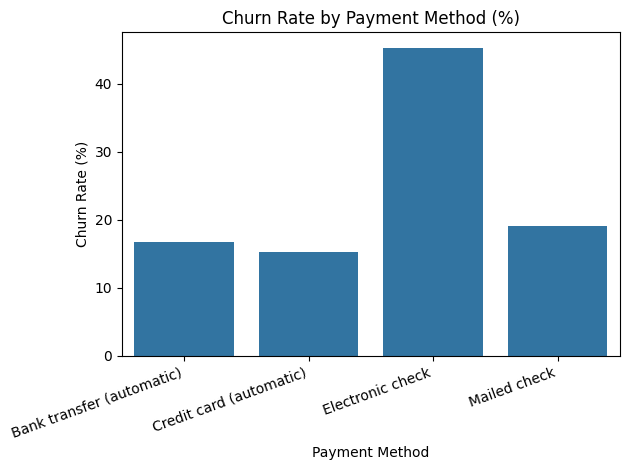

In [43]:
# 6.4 Churn rate by Payment Method
churn_by_payment = (
    data.groupby("PaymentMethod")["Churn"]
    .value_counts(normalize=True)
    .unstack()
    .rename(columns={"Yes": "Churn_Yes", "No": "Churn_No"}) * 100
)

print("\nChurn rate (%) by Payment Method:")
display(churn_by_payment.round(2))
print("\n")


# For clear visualization of churn rate only (Yes)
plt.figure()
sns.barplot(
    x=churn_by_payment.index,
    y=churn_by_payment["Churn_Yes"]
)
plt.title("Churn Rate by Payment Method (%)")
plt.xlabel("Payment Method")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()